### Dot product

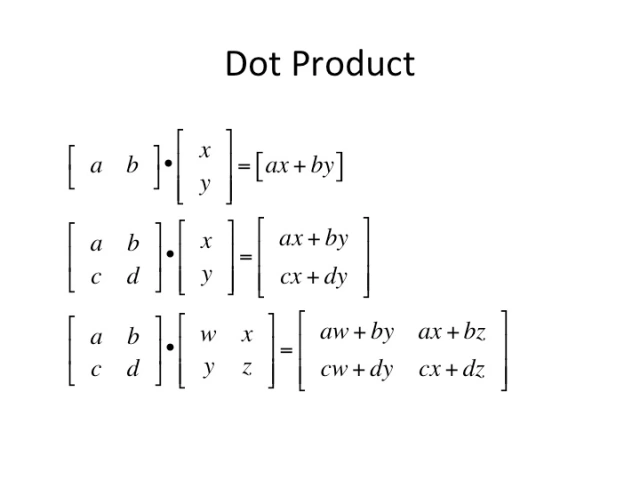

In [54]:
### dot product using numpy
import numpy as np

x = np.array([2,4,6])
y = np.array([3,5,7])

dot = np.dot(x, y)
print(dot)

68


In [55]:
3*2 + 4*5 + 6*7

68

In [56]:
x = np.array([[1,2,3], [4,5,6]])
y = np.array([[4,5,6], [7,8,9]])

print('Shape of x: ' , x.shape)
print('Shape of y: ' , y.shape)

Shape of x:  (2, 3)
Shape of y:  (2, 3)


In [57]:
np.dot(x, y)

ValueError: shapes (2,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

#### During dot product the inner dimensions should match

In [58]:
print('Transpose y:',y.T.shape)

Transpose y: (3, 2)


In [59]:
x.shape

(2, 3)

In [60]:
np.dot(x, y.T)

array([[ 32,  50],
       [ 77, 122]])

### Linear Regression from scratch

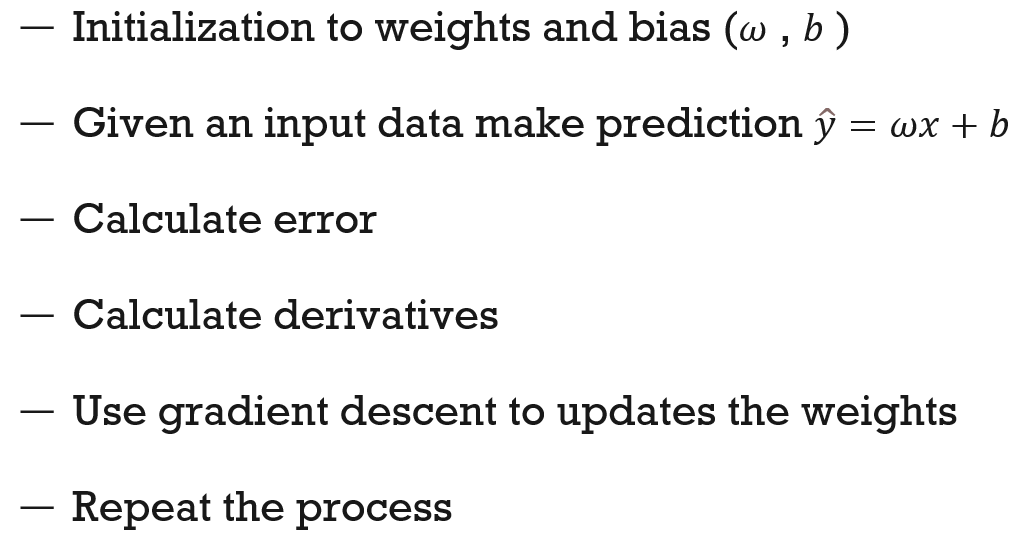

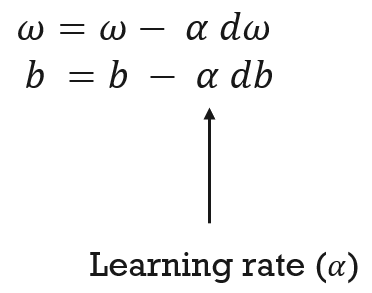

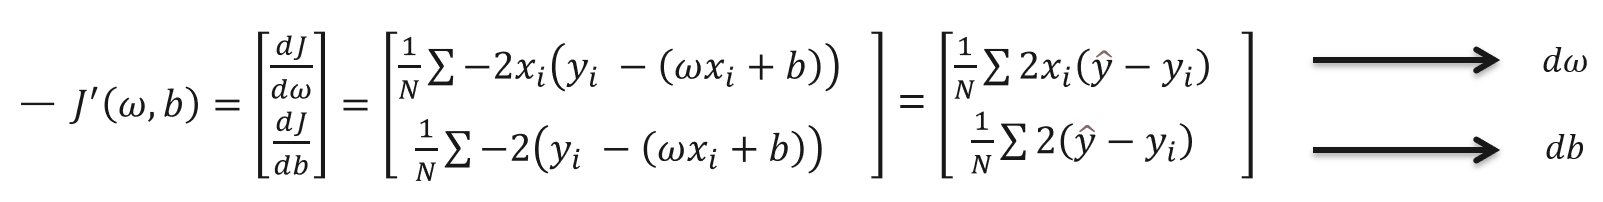

In [61]:
def cal_mse(y_pred,y):
    return np.mean((y_pred-y)**2)

In [62]:
class LinearRegression:

    def __init__(self,lr=0.001 ,n_iter=1000):

        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None

    def fit(self,X , y):
        N , n_features = X.shape                    
        # weights and bias initialization
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent iterations
        for n in range(self.n_iter):
            
            y_hat = np.dot(X,self.weights) + self.bias # y_hat calculation

            if n % 100 == 0:
                print(f'Iteration #:{n} MSE: {cal_mse(y_hat,y)}')

            # calculation of derivates
            dw = (1/N) * np.dot(X.T,(y_hat-y))    
            db = (1/N) * np.sum(y_hat-y)

            # weight updates 
            self.weights = self.weights - self.lr * dw   # w2 = w1 - lr * dw
            self.bias = self.bias - self.lr * db         # b2 = b1 - lr * db


    def predict(self,X):
        
        y_pred = np.dot(X,self.weights) + self.bias     # making predictions

        return y_pred

In [63]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X , y = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=100)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20,random_state=0)

regressor = LinearRegression(lr=0.001)

In [64]:
regressor.fit(X_train,y_train) # model fit
preds = regressor.predict(X_test)  # making predictions on test set

Iteration #:0 MSE: 2047.0819228917364
Iteration #:100 MSE: 1773.4766038516882
Iteration #:200 MSE: 1548.5449214131147
Iteration #:300 MSE: 1363.61059968279
Iteration #:400 MSE: 1211.5470584217396
Iteration #:500 MSE: 1086.50006016482
Iteration #:600 MSE: 983.6600953440196
Iteration #:700 MSE: 899.0755681185441
Iteration #:800 MSE: 829.4994546873259
Iteration #:900 MSE: 772.2634246749749


In [65]:
cal_mse(preds,y_test)

794.1060686958748

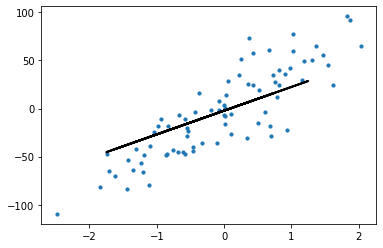

In [66]:
# plot the best fit(close to) line 

import matplotlib.pyplot as plt

plt.scatter(X_train, y_train, s=10)
plt.plot(X_test, preds, color='black', linewidth=2, label='Prediction')
plt.show()